# EVALUACIÓN DEL MODELO DE MACHINE LEARNING
# 🧠 MÉTRICAS DE EVALUACIÓN
## 1. R² Score (Coeficiente de determinación) 
✅ Cuanto más alto, mejor.

Mide qué proporción de la variabilidad de 'y' puede ser explicada por 'X'.

Valores posibles:

1 → predicción perfecta

0 → el modelo no explica nada

Negativo → peor que predecir la media



## 2. RMSE (Root Mean Squared Error)
✅ Cuanto más bajo, mejor.

Raíz cuadrada del error cuadrático medio.

Penaliza más los errores grandes.


## 3. MAE (Mean Absolute Error)
✅ Cuanto más bajo, mejor.

Promedio de los errores absolutos.

No penaliza tanto como RMSE.



# ✅ ¿CUÁL ES EL MEJOR MODELO?
Regla general:

- Prioriza R²: Si un modelo tiene R² más cercano a 1, es más confiable.

- Entre modelos con R² similares, elige el que tenga menor RMSE (menor variabilidad en los errores).

- Usa MAE como referencia secundaria de precisión.

In [ ]:
# 📌 Importación de librerías necesarias
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [33]:
# 📊 Cargar y preparar datos
df = pd.read_csv("data/sugar_consumption_dataset.csv")
df = df.dropna()

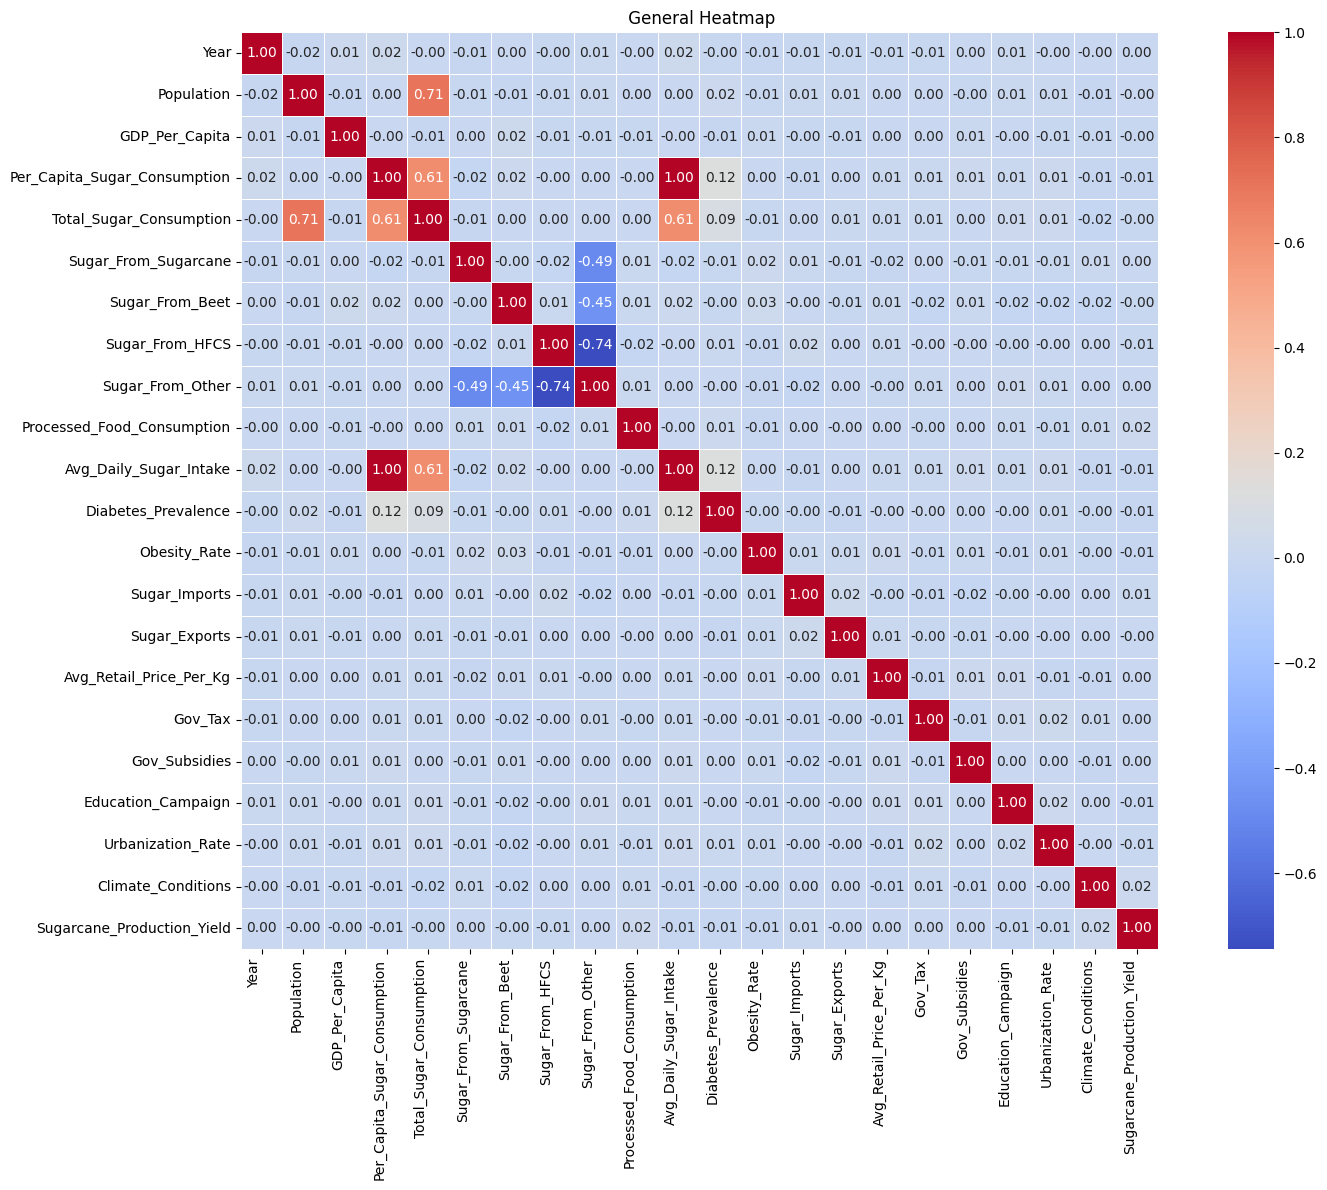

In [22]:
from sklearn.preprocessing import StandardScaler
#df_encoded = pd.get_dummies(df, drop_first=True)
# Seleccionar columnas numéricas y excluir "Country"
# 📊 Cargar y preparar datos
df0 = pd.read_csv("data/sugar_consumption_dataset.csv")
Country = 'Mexico'
# df = df0[df0["Country"] == Country]
df= df0
numeric_df = df.select_dtypes(include=[np.number])

# # Escalar los datos
# scaler = StandardScaler()
# scaled_array = scaler.fit_transform(numeric_df)
# scaled_df = pd.DataFrame(scaled_array, columns=numeric_df.columns)
# Calcular matriz de correlaciones
corr_matrix = numeric_df.corr()

# # Aplicar máscara: dejar solo correlaciones con abs(valor) >= 0.1
# mask = corr_matrix.abs() < 0.1
# corr_masked = corr_matrix.mask(mask)

# Graficar heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5,
            cbar=True, square=True)
plt.title(f" General Heatmap")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [29]:
df.head()

,Country,Year,Country_Code,Continent,Region,Population,GDP_Per_Capita,Per_Capita_Sugar_Consumption,Total_Sugar_Consumption,Sugar_From_Sugarcane,...,Obesity_Rate,Sugar_Imports,Sugar_Exports,Avg_Retail_Price_Per_Kg,Gov_Tax,Gov_Subsidies,Education_Campaign,Urbanization_Rate,Climate_Conditions,Sugarcane_Production_Yield
0,France,1972,FRA,Europe,Western Europe,2.617306e+08,8692.631696,12.827741,3.357413e+06,68.422963,...,34.094017,5.401670e+06,2.358929e+06,3.864020,0.0,0,0.0,34.503398,3,52.433972
1,Australia,2003,AUS,Oceania,Australia & New Zealand,1.737965e+08,6859.195960,21.362632,3.712750e+06,55.432564,...,16.040118,3.418790e+06,9.694348e+06,3.282101,0.0,0,0.0,31.783067,4,58.382055
2,Germany,1963,DEU,Europe,Western Europe,1.236366e+08,22075.950575,32.077485,3.965951e+06,86.466120,...,14.405741,8.987281e+06,5.451632e+06,1.097687,0.0,0,0.0,51.551345,1,32.184735
3,France,1965,FRA,Europe,Western Europe,2.989961e+08,3728.027392,47.648930,1.424685e+07,69.806707,...,38.499271,5.179004e+06,8.048500e+06,2.761297,0.0,0,0.0,80.386281,2,84.296019
4,Germany,2010,DEU,Europe,Western Europe,7.341531e+06,40420.973962,23.214343,1.704288e+05,63.772278,...,36.190977,6.463439e+06,7.062910e+06,4.219431,0.0,0,1.0,49.701153,3,66.110815


In [ ]:

import scipy.stats as stats

# Asegúrate de que la variable categórica 'Region' esté correctamente definida
# Si 'Region' es una variable categórica, asegúrate de convertirla a categorías si es necesario
df['Region'] = df['Region'].astype('category')

# Dividir los datos por las categorías de la variable 'Region'
groups = [df[df['Region'] == region]['Diabetes_Prevalence'] for region in df['Region'].unique()]

# Aplicar el test de ANOVA de una vía
f_statistic, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


In [35]:

# Si tienes XGBoost instalado:
try:
    from xgboost import XGBRegressor
    xgb_available = True
except ImportError:
    xgb_available = False


#Variables predictoras (centradas en tendencias de consumo)
# features = ['Year', 'GDP_Per_Capita', 'Population', 'Processed_Food_Consumption', 
#             'Urbanization_Rate', 'Sugar_Imports', 'Sugar_Exports', 
#             'Gov_Tax', 'Gov_Subsidies', 'Avg_Daily_Sugar_Intake',]

features = ['Avg_Daily_Sugar_Intake', 'Total_Sugar_Consumption', 'Per_Capita_Sugar_Consumption',]


X = df[features]

y = df['Diabetes_Prevalence']  # Variable objetivo
# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de modelos
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

if xgb_available:
    models["XGBoost"] = XGBRegressor(random_state=42)

# Evaluación de modelos
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'R² Score': r2,
        'RMSE': rmse,
        'MAE': mae
    })

# Mostrar resultados ordenados
results_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False)
print("\n🔍 Comparación de modelos para Year y Total Sugar Consumption:\n")
print(results_df)





🔍 Comparación de modelos para Year y Total Sugar Consumption:

                 Model  R² Score      RMSE       MAE
0    Linear Regression  0.013688  3.819605  3.322357
2    Gradient Boosting -0.000558  3.847091  3.336841
4              XGBoost -0.125921  4.080988  3.468398
3  K-Nearest Neighbors -0.187931  4.191862  3.541600
1        Random Forest -0.198445  4.210371  3.569239


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Cargar el dataset
df = pd.read_csv("data/sugar_consumption_dataset.csv")

# Eliminar filas con valores faltantes
df = df.dropna()

# Definir features y targets
features = ['Year', 'GDP_Per_Capita', 'Population', 'Processed_Food_Consumption',
            'Urbanization_Rate', 'Sugar_Imports', 'Sugar_Exports',
            'Gov_Tax', 'Gov_Subsidies', 'Avg_Daily_Sugar_Intake']
targets = ['Total_Sugar_Consumption', 'Diabetes_Prevalence']

X = df[features]
y = df[targets]

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos a comparar
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": MultiOutputRegressor(RandomForestRegressor(random_state=42)),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Entrenamiento y evaluación
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics = {}
    for i, target in enumerate(targets):
        r2 = r2_score(y_test[target], y_pred[:, i])
        mae = mean_absolute_error(y_test[target], y_pred[:, i])
        rmse = mean_squared_error(y_test[target], y_pred[:, i]) ** 0.5
        metrics[target] = {"R2": r2, "MAE": mae, "RMSE": rmse}
    
    results[name] = metrics

# Mostrar resultados
import pprint
pprint.pprint(results)


{'K-Nearest Neighbors': {'Diabetes_Prevalence': {'MAE': 3.5081601214350773,
                                                 'R2': -0.18639711387809266,
                                                 'RMSE': 4.189155357995658},
                         'Total_Sugar_Consumption': {'MAE': 2627148.52223588,
                                                     'R2': 0.3728783461809646,
                                                     'RMSE': 3619808.3996835537}},
 'Linear Regression': {'Diabetes_Prevalence': {'MAE': 3.3233228576976934,
                                               'R2': 0.012792790738556215,
                                               'RMSE': 3.821339162427829},
                       'Total_Sugar_Consumption': {'MAE': 1268990.918855818,
                                                   'R2': 0.8668902355762127,
                                                   'RMSE': 1667687.380798521}},
 'Random Forest': {'Diabetes_Prevalence': {'MAE': 3.3825778289453985,
  

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Si tienes XGBoost instalado:
try:
    from xgboost import XGBRegressor
    xgb_available = True
except ImportError:
    xgb_available = False

# Cargar datos y eliminar filas con valores nulos (como en tu código)
df = pd.read_csv("data/sugar_consumption_dataset.csv")
df = df.dropna()

# Variables predictoras y objetivo (como en tu código)
features = ['Avg_Daily_Sugar_Intake', 'Total_Sugar_Consumption', 'Per_Capita_Sugar_Consumption']
X = df[features]
y = df['Diabetes_Prevalence']

# División del dataset (como en tu código)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de modelos (como en tu código)
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor()
}



 Comparación de modelos con detección de Overfitting:

                 Model  R2 Train  RMSE Train  MAE Train   R2 Test  RMSE Test  \
0    Linear Regression  0.017264    3.751424   3.253448  0.013688   3.819605   
2    Gradient Boosting  0.070178    3.649032   3.159636 -0.000558   3.847091   
4              XGBoost  0.397629    2.937039   2.468732 -0.125921   4.080988   
3  K-Nearest Neighbors  0.202844    3.378698   2.828034 -0.187931   4.191862   
1        Random Forest  0.839561    1.515768   1.265514 -0.198445   4.210371   

   MAE Test  Overfitting  
0  3.322357        False  
2  3.336841         True  
4  3.468398         True  
3  3.541600         True  
1  3.569239         True  


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Si tienes XGBoost instalado:
try:
    from xgboost import XGBRegressor
    xgb_available = True
except ImportError:
    xgb_available = False

# Cargar datos y eliminar filas con valores nulos (como en tu c贸digo)
df = pd.read_csv("data/sugar_consumption_dataset.csv")
df = df.dropna()

# Variables predictoras y objetivo (como en tu c贸digo)
features = ['Avg_Daily_Sugar_Intake', 'Total_Sugar_Consumption', 'Per_Capita_Sugar_Consumption']
X = df[features]
y = df['Diabetes_Prevalence']

# Divisi贸n del dataset (como en tu c贸digo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de modelos (como en tu c贸digo)
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

if xgb_available:
    models["XGBoost"] = XGBRegressor(random_state=42)

# Evaluaci贸n de modelos con detecci贸n de overfitting
results = []

for name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Hacer predicciones en entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular m茅tricas en entrenamiento
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)

    # Calcular m茅tricas en prueba
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)

    # Detectar overfitting de forma sencilla (comparando R虏)
    overfitting = False
    if r2_test < r2_train - 0.05:  # Una diferencia del 5% en R虏 podr铆a indicar overfitting
        overfitting = True

    results.append({
        'Model': name,
        'R2 Train': r2_train,
        'RMSE Train': rmse_train,
        'MAE Train': mae_train,
        'R2 Test': r2_test,
        'RMSE Test': rmse_test,
        'MAE Test': mae_test,
        'Overfitting': overfitting
    })

# Mostrar resultados ordenados
results_df = pd.DataFrame(results).sort_values(by='R2 Test', ascending=False)
print("\n Comparaci贸n de modelos con detecci贸n de Overfitting:\n")
print(results_df)


 Comparaci贸n de modelos con detecci贸n de Overfitting:

                 Model  R2 Train  RMSE Train  MAE Train   R2 Test  RMSE Test  \
0    Linear Regression  0.017264    3.751424   3.253448  0.013688   3.819605   
2    Gradient Boosting  0.070178    3.649032   3.159636 -0.000558   3.847091   
4              XGBoost  0.397629    2.937039   2.468732 -0.125921   4.080988   
3  K-Nearest Neighbors  0.202844    3.378698   2.828034 -0.187931   4.191862   
1        Random Forest  0.839561    1.515768   1.265514 -0.198445   4.210371   

   MAE Test  Overfitting  
0  3.322357        False  
2  3.336841         True  
4  3.468398         True  
3  3.541600         True  
1  3.569239         True  
